## Import Libraries

In [2]:
from numpy import average
from sklearn.metrics import accuracy_score
import torch 
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms 
import torch.optim as optim 
# from model import Classifier_Model_1, Classifier_Model_2 
import matplotlib.pyplot as plt 

## Create Models

In [3]:
from turtle import forward
import torch 
import torch.nn as nn

In [4]:
class Classifier_Model_1(nn.Module):
    def __init__(self, input):

        super(Classifier_Model_1, self).__init__()

        self.input_layer = nn.Linear(input, 64)
        self.first_hidden = nn.Linear(64, 64)
        self.second_hidden = nn.Linear(64, 64)
        self.third_hidden = nn.Linear(64, 64)
        self.output_layer = nn.Linear(64, 10)

        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.sigmoid(  self.input_layer(x) )
        x = self.sigmoid(  self.first_hidden(x) )
        x = self.sigmoid(  self.second_hidden(x) )
        x = self.sigmoid(  self.third_hidden(x) )
        x = self.softmax(  self.output_layer(x) )

        return x 

In [5]:
class Classifier_Model_2(nn.Module):
     def __init__(self, input):
          super(Classifier_Model_2, self).__init__()

          self.input_layer = nn.Linear(input, 64)
          self.first_later = nn.Linear(64, 64)
          self.second_layer = nn.Linear(64, 64)
          self.third_layer = nn.Linear(64, 64)
          self.output_layer = nn.Linear(64, 10)

          self.relu = nn.ReLU()
          self.sigmoid = nn.Sigmoid()
          self.softmax = nn.Softmax(dim=1)

     def forward(self, x):
          x = self.relu( self.input_layer(x) )
          x = self.relu( self.first_later(x) )
          x = self.relu( self.second_layer(x) )
          x = self.relu( self.third_layer(x) )
          x = self.softmax( self.output_layer(x) )

          return x 

In [6]:
class Classifier_Model_3(nn.Module):
     def __init__(self, input):
          super(Classifier_Model_3, self).__init__()

          self.first_later = nn.Linear(input, 64)
          self.second_layer = nn.Linear(64, 64)
          self.third_layer = nn.Linear(64, 32)
          self.last_layer = nn.Linear(32, 10)

          self.relu = nn.ReLU()
          self.sigmoid = nn.Sigmoid()
          self.softmax = nn.Softmax(dim=1)

     def forward(self, x):
          x = self.relu( self.first_later(x) )
          x = self.relu( self.second_layer(x) )
          x = self.relu( self.third_layer(x) )
          x = self.softmax( self.last_layer(x) )

          return x 

## Transformations

In [7]:
transform_train = transforms.Compose([  transforms.Resize((28, 28)), 
                                        transforms.RandomHorizontalFlip(p=0.4), 
                                        transforms.RandomRotation(20), 
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean=[0.5], std=[0.5])
                                        # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                                     ])

transform_test  = transforms.Compose([  transforms.Resize((28, 28)), 
                                        transforms.ToTensor(), 
                                        transforms.Normalize(mean=[0.5], std=[0.5])
                                        # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                                    ])

## Download Dataset

In [ ]:
dataset_train = datasets.FashionMNIST(root='data', download=True, train=True, transform=transform_train)
dataset_test  = datasets.FashionMNIST(root='data', download=True, train=False, transform=transform_test)


dataloader_train = DataLoader(dataset=dataset_train, batch_size=64, shuffle=True)
dataloader_test  = DataLoader(dataset=dataset_test,  batch_size=64, shuffle=True)

## Instantiate Model, Crierion, and Optimizer

In [9]:
model = Classifier_Model_1(784)

optimizer = optim.Adam(model.parameters(), lr=0.003)
criterion = nn.CrossEntropyLoss()

## Train Model

In [10]:

epochs, all_train_losses, all_test_losses, all_accuracies = 30, [], [], []

for epoch in range(epochs):
    training_loss = 0
    for features_train, target_train in iter(dataloader_train):

        # features_train = features_train.view(features_train.shape[0], -1)
        features_train = features_train.view( -1, 28*28)

        optimizer.zero_grad()
        prediction_train = model.forward(features_train)
        loss_train = criterion(prediction_train, target_train)
        loss_train.backward()
        optimizer.step()

        training_loss += loss_train.item()

    average_training_loss = training_loss/len(dataloader_train)
    all_train_losses.append(average_training_loss)

    model.eval()
    testing_loss = 0 
    running_accuracy = 0
    with torch.no_grad():
        for features_test, targets_test in iter(dataloader_test):

            # features_test = features_test.view(-1, 28*28)
            features_test = features_test.view( -1, 28*28)

            prediction_test = model.forward(features_test)

            prediction_class = torch.argmax(prediction_test, dim=1)

            running_accuracy += accuracy_score(targets_test, prediction_class)

            loss_test = criterion(prediction_test, targets_test)
            testing_loss += loss_test.item()
        
        average_testing_loss = testing_loss/len(dataloader_test)
        all_test_losses.append(average_testing_loss)

        average_running_accuracy = running_accuracy/len(dataloader_test)
        all_accuracies.append(average_running_accuracy)

    model.train()

    print(f'{epoch+1:3}/{epochs}  |  Training Loss  :  {average_training_loss:.8f}   |   Testing Loss  :  {average_testing_loss:.8f}  |  Accuray  :  {average_running_accuracy:.8f}')



  1/30  |  Training Loss  :  2.11182296   |   Testing Loss  :  2.01310540  |  Accuray  :  0.44247611
  2/30  |  Training Loss  :  2.02490940   |   Testing Loss  :  2.00903893  |  Accuray  :  0.44446656
  3/30  |  Training Loss  :  2.01485141   |   Testing Loss  :  2.00542560  |  Accuray  :  0.43988854
  4/30  |  Training Loss  :  1.97926610   |   Testing Loss  :  1.94007413  |  Accuray  :  0.52786624
  5/30  |  Training Loss  :  1.82690238   |   Testing Loss  :  1.75398041  |  Accuray  :  0.70740446
  6/30  |  Training Loss  :  1.77151483   |   Testing Loss  :  1.74186517  |  Accuray  :  0.72024283
  7/30  |  Training Loss  :  1.75455201   |   Testing Loss  :  1.74917323  |  Accuray  :  0.71208201
  8/30  |  Training Loss  :  1.75377195   |   Testing Loss  :  1.74285560  |  Accuray  :  0.71765525
  9/30  |  Training Loss  :  1.75131103   |   Testing Loss  :  1.73804304  |  Accuray  :  0.72362659
 10/30  |  Training Loss  :  1.74704182   |   Testing Loss  :  1.74022449  |  Accuray  :  0

## Save Model

In [11]:
torch.save({ "model_state": model.state_dict(), "input_size": 28*28}, 'new_trained_model')

## Plot Results

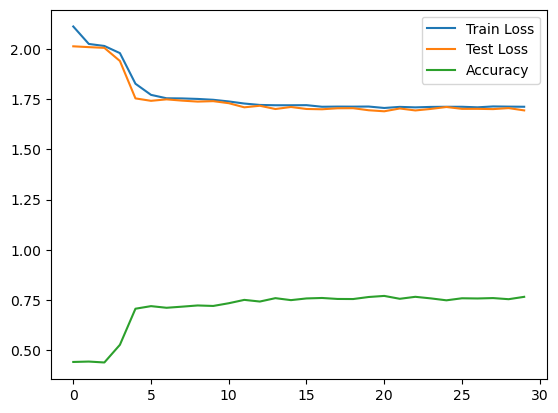

In [12]:
plt.plot(all_train_losses, label='Train Loss')
plt.plot(all_test_losses,  label='Test Loss')
plt.plot(all_accuracies,   label='Accuracy')
plt.legend()
plt.show()

## Load Trained Model

In [14]:
trained_model = torch.load('new_trained_model')
model_state = trained_model['model_state']

model = Classifier_Model_1(28*28)
model.load_state_dict(model_state)

<All keys matched successfully>

## Test Dataset

In [ ]:
transform_test   = transforms.Compose([  transforms.Grayscale(), transforms.Resize((28, 28)),  transforms.ToTensor(), transforms.Normalize(mean=[0.5], std=[0.5])  ])
dataset_test     = datasets.FashionMNIST(root='data_validate', download=True, train=False, transform=transform_test)
dataloader_test  = DataLoader(dataset=dataset_test,  batch_size=64, shuffle=True)

data_iter = iter(dataloader_test)
images, labels = data_iter.next()

## Make Predictions

In [16]:
check_image = images[1]
check_image_flatten = check_image.view(check_image.shape[0], -1)
prediction = model.forward(check_image_flatten)

## Functions to Plot Results

In [17]:
import numpy as np 

def view_classify(img, ps, version="MNIST"):

    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())

    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))

    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot'], size='small')
        
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()


In [18]:
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

## Plot Results

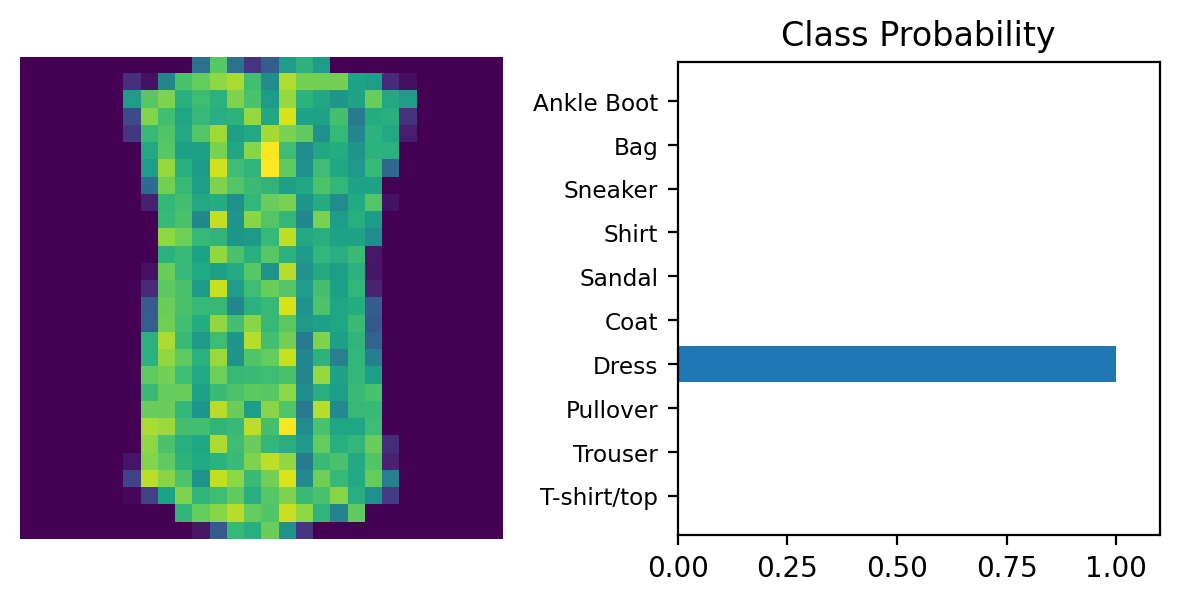

In [19]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

dataiter = iter(dataloader_test)
images, labels = dataiter.next()
images.resize_(64, 1, 784)
img = images[1]

ps = model(img)                                 # ps stands for probabilities: your model should return values between 0 and 1 that sums to 1. A softmax does this job!

view_classify(img, ps, version='Fashion')       # Plot the image and probabilities

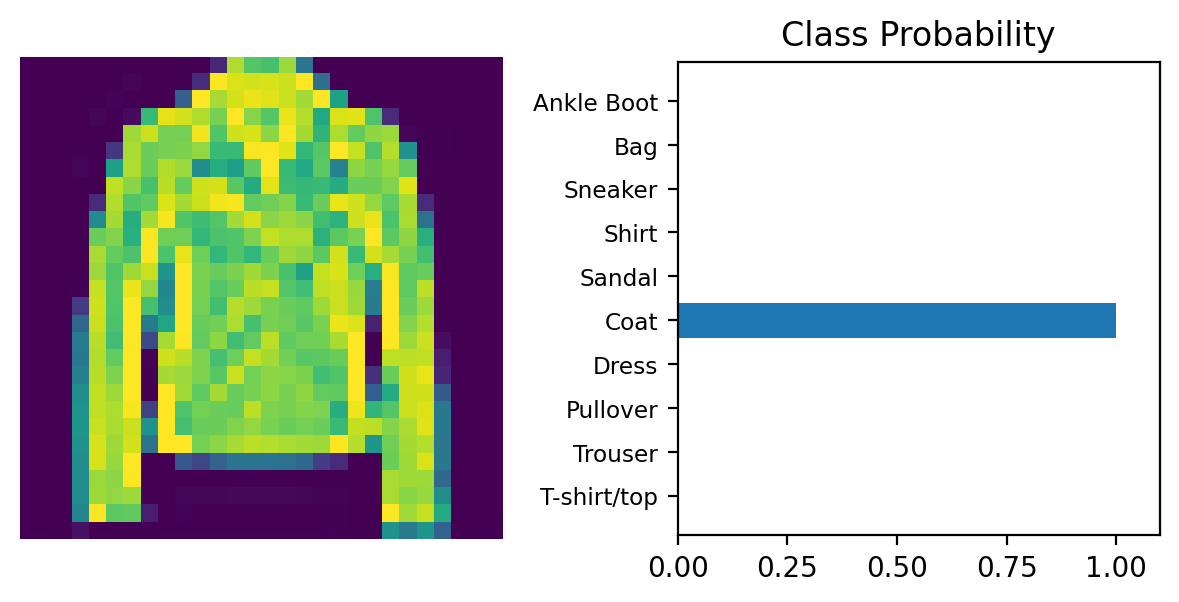

In [20]:
view_classify(check_image, prediction, version='Fashion')
plt.show()

In [21]:
top_p, top_class = ps.topk(1, dim=1)
print(top_class[:10,:])

tensor([[3]])
